<a href="https://colab.research.google.com/github/rtlab1417/my-raspberry/blob/master/Copy_of_ultrasonic_HC_SR04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raspberry Pi - Tutorial of Ultrasonic 1
Part:

*   Raspberry Pi 3B+ with a Maker Pi HAT (Cytron)
*   ultrasonic, HC-SR04

*   resistor - 1kOhm x 1, 2.2kOhm x 1 (I dun have 2kOhm exactly)
*a bread board for experiment

*   List item
*   List item


*   Some jumper wires


---






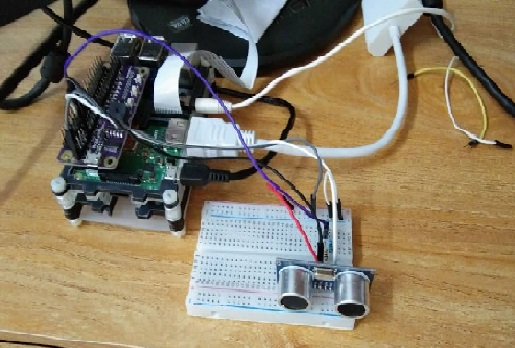



---



Main reference:

[The PiHut](https://thepihut.com/blogs/raspberry-pi-tutorials/hc-sr04-ultrasonic-range-sensor-on-the-raspberry-pi)

Note 1:
RPI GPIO work on 3.3VDC but HC-SR04 works on 5VDC. To protect GPIO, a voltage divider circuitry is used on the ECHO pin. Refer to link above.

Note 2:
TRIG pin receives a pulse from RPI. 


---



## Circuitry

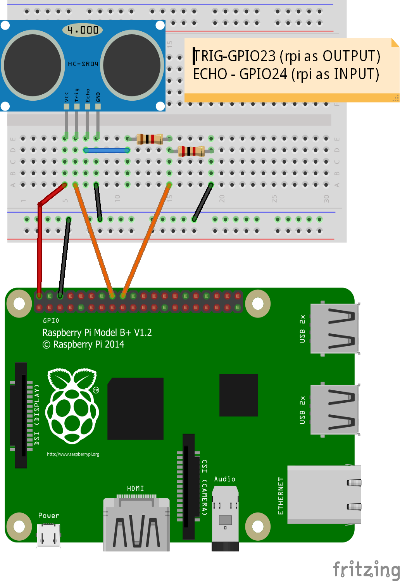

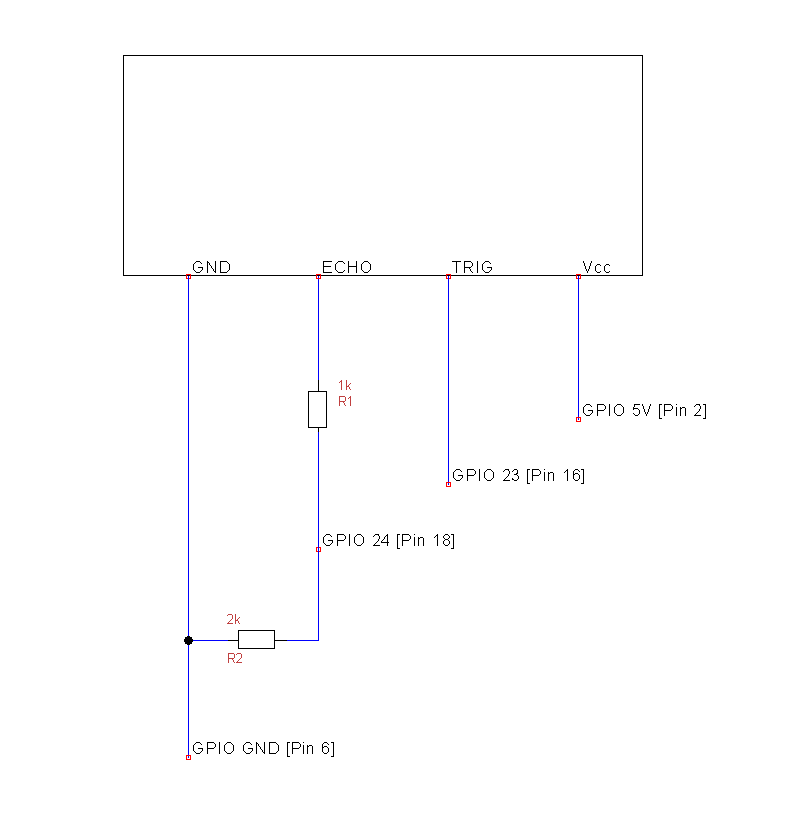

Source: The PiHut

---



# Code 1
This codes read, print the result and exit the program.

In [ ]:
#!/usr/bin/python
#+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
#|R|a|s|p|b|e|r|r|y|P|i|-|S|p|y|.|c|o|.|u|k|
#+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
#
# ultrasonic_1.py
# Measure distance using an ultrasonic module
#
# Author : Matt Hawkins
# Date   : 09/01/2013

# Import required Python libraries
import time
import RPi.GPIO as GPIO

# Use BCM GPIO references
# instead of physical pin numbers
GPIO.setmode(GPIO.BCM)

# Define GPIO to use on Pi
GPIO_TRIGGER = 23
GPIO_ECHO    = 24

print "Ultrasonic Measurement"

# Set pins as output and input
GPIO.setup(GPIO_TRIGGER,GPIO.OUT)  # Trigger
GPIO.setup(GPIO_ECHO,GPIO.IN)      # Echo

# Set trigger to False (Low)
GPIO.output(GPIO_TRIGGER, False)

# Allow module to settle
time.sleep(0.5)

# Send 10us pulse to trigger
GPIO.output(GPIO_TRIGGER, True)
time.sleep(0.00001)
GPIO.output(GPIO_TRIGGER, False)
start = time.time()

while GPIO.input(GPIO_ECHO)==0:
  start = time.time()

while GPIO.input(GPIO_ECHO)==1:
  stop = time.time()

# Calculate pulse length
elapsed = stop-start

# Distance pulse travelled in that time is time
# multiplied by the speed of sound (cm/s)
distance = elapsed * 34300

# That was the distance there and back so halve the value
distance = distance / 2

print "Distance : %.1f" % distance

# Reset GPIO settings
GPIO.cleanup()

# Code 2
This code read, print continuously.

In [ ]:
#!/usr/bin/python
#+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
#|R|a|s|p|b|e|r|r|y|P|i|-|S|p|y|.|c|o|.|u|k|
#+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
#
# ultrasonic_2.py
# Measure distance using an ultrasonic module
# in a loop.
#
# Ultrasonic related posts:
# http://www.raspberrypi-spy.co.uk/tag/ultrasonic/
#
# Author : Matt Hawkins
# Date   : 16/10/2016
# -----------------------

# -----------------------
# Import required Python libraries
# -----------------------
from __future__ import print_function
import time
import RPi.GPIO as GPIO

# -----------------------
# Define some functions
# -----------------------
def measure():
  # This function measures a distance
  GPIO.output(GPIO_TRIGGER, True)
  # Wait 10us
  time.sleep(0.00001)
  GPIO.output(GPIO_TRIGGER, False)
  start = time.time()
  
  while GPIO.input(GPIO_ECHO)==0:
    start = time.time()

  while GPIO.input(GPIO_ECHO)==1:
    stop = time.time()

  elapsed = stop-start
  distance = (elapsed * speedSound)/2

  return distance

def measure_average():
  # This function takes 3 measurements and
  # returns the average.

  distance1=measure()
  time.sleep(0.1)
  distance2=measure()
  time.sleep(0.1)
  distance3=measure()
  distance = distance1 + distance2 + distance3
  distance = distance / 3
  return distance

# -----------------------
# Main Script
# -----------------------

# Use BCM GPIO references
# instead of physical pin numbers
GPIO.setmode(GPIO.BCM)

# Define GPIO to use on Pi
GPIO_TRIGGER = 23
GPIO_ECHO    = 24

# Speed of sound in cm/s at temperature
temperature = 20
speedSound = 33100 + (0.6*temperature)

print("Ultrasonic Measurement")
print("Speed of sound is",speedSound/100,"m/s at ",temperature,"deg")

# Set pins as output and input
GPIO.setup(GPIO_TRIGGER,GPIO.OUT)  # Trigger
GPIO.setup(GPIO_ECHO,GPIO.IN)      # Echo

# Set trigger to False (Low)
GPIO.output(GPIO_TRIGGER, False)

# Allow module to settle
time.sleep(0.5)

# Wrap main content in a try block so we can
# catch the user pressing CTRL-C and run the
# GPIO cleanup function. This will also prevent
# the user seeing lots of unnecessary error
# messages.
try:
  while True:
    distance = measure_average()
    print("Distance : {0:5.1f}".format(distance))
    time.sleep(1)

except KeyboardInterrupt:
  # User pressed CTRL-C
  # Reset GPIO settings
  GPIO.cleanup()

## Download .py

ultrasonic_1.py
ultrasonic_2.py

[from Github]  (https://github.com/rtlab1417/my-raspberry)